# Gradient Descent for Linear Regression 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-&amp;-Problem-Definition" data-toc-modified-id="Introduction-&amp;-Problem-Definition-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction &amp; Problem Definition</a></span><ul class="toc-item"><li><span><a href="#Simple-Linear-Regression" data-toc-modified-id="Simple-Linear-Regression-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simple Linear Regression</a></span></li></ul></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Gradient Descent</a></span><ul class="toc-item"><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Gradient Descent</a></span></li><li><span><a href="#Cost-Function" data-toc-modified-id="Cost-Function-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cost Function</a></span></li><li><span><a href="#Gradient-Descent-Model" data-toc-modified-id="Gradient-Descent-Model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Gradient Descent Model</a></span></li><li><span><a href="#Loss-Profile" data-toc-modified-id="Loss-Profile-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Loss Profile</a></span></li></ul></li><li><span><a href="#Visualize-the-Gradient-Descent" data-toc-modified-id="Visualize-the-Gradient-Descent-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize the Gradient Descent</a></span></li><li><span><a href="#Cross-Check-with-scikit-learn" data-toc-modified-id="Cross-Check-with-scikit-learn-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Cross-Check with scikit-learn</a></span></li></ul></div>

## Introduction & Problem Definition

In this notebook, the algorithm of the Batch Gradient Descent for Linear Regression is implemented. Initially, we define the linear regression function that is used to generate random data. This dataset is then used to fit the regression line. Afterwards, we implement the Gradient Descent model and evaluate it with respect to the cost (loss) function. Finally, we visualize the Gradient Descent method in an interactive plot.

The main aim of this notebook is to present how the Batch Gradient Descent algorithm can be used to fit a regression line to a set of data by calculating the coefficients (intercept and slope) of the regression equation.


---

### Simple Linear Regression 

A linear regression model attempts to explain the relationship between two or more variables using a straight line. The true regression line is usually not known. However, the regression line of two variables can be estimated by estimating the coefficients $\theta_0$ and $\theta_1$ of the regression  for an observed data set. 

\begin{equation}
  y = \theta_0 + \theta_1 x 
\end{equation}

The above equation is the linear regression model that can be used to explain the relation between $x$ and $y$. The estimated regression line, obtained using the values of  $\theta_0$ and $\theta_1$ , is called the fitted line. In Python, the above equation can be defined as a function: 

In [1]:
def f(x, theta0, theta1):
    return theta0 + theta1*x

## Data Preparation

Initially, let's import the libraries that we are going to use..

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

Let's define the true values of the function and generate some data!

In [3]:
# true thetas
theta0_true = 3
theta1_true = 2

So our actual function would be:

\begin{equation}
  y = 3 + 2 x 
\end{equation}

..and based on the actual function, let's generate some data!

We'll create an array of 100 random numbers...

In [4]:
X = np.random.random_sample((100,))

Now let's create the $y$ values and add some noise on them..

In [5]:
# array of 100 random numbers with mean = 0 and STD = 0.15 
mu, sigma = 0, 0.15
noise = np.random.normal(mu, sigma, 100)
# use the function with the true thetas and add noise to each data-point
y = f(X, theta0_true, theta1_true) + noise

So now our data ($x$ and $y$ values) look like below.

In [6]:
# print the first 10 values of X and y
print(np.c_[X, y][0:10])

[[ 0.1349527   3.31973226]
 [ 0.17096613  3.17496925]
 [ 0.22502821  3.65792562]
 [ 0.27705542  3.4324365 ]
 [ 0.86408007  4.49421469]
 [ 0.14848106  3.26078154]
 [ 0.29443914  3.13742223]
 [ 0.46710612  3.60248374]
 [ 0.14523653  3.26529922]
 [ 0.84575315  4.53464689]]


A scatter plot can be obtained as shown in the following figure to visualize our dataset. In this scatter-plot, $y_i$ is plotted for different values x$_i$.

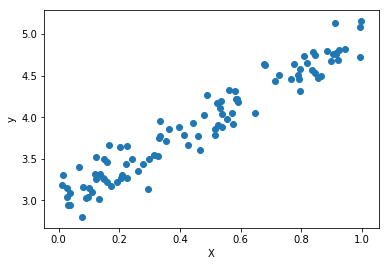

In [7]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

As we were expecting, there is a strong correlation between the $y$ and $x$ values and it is clear that a linear regression line could be fitted to the data-points.

## Gradient Descent

### Gradient Descent

After defining the function and generating the data that will be used to fit our model, it is time to create the Gradient Descent model. Gradient Descent is a first-order derivative optimization method for unconstrained nonlinear function optimization. It is called Gradient Descent because it was envisioned for function minimization. 

So, the whole point of GD is to minimize the cost function.

The meat of the algorithm is the process of getting to the lowest error value. Analogically this can be seen as, walking down into a valley, trying to find gold(the lowest error value). While we’re at this, I’m sure you’ve wondered how we would find the deepest valley in a function with many valleys, if you can only see the valleys around you? I won’t be going over the ways to solve that problem as that is beyond of this post(meant for beginners). However, just know that there are ways to work around that problem.

Moving forward, to find the lowest error(deepest valley) in the cost function(with respect to one weight), we need to tweak the parameters of the model.Using calculus, we know that the slope of a function is the derivative of the function with respect to a value. This slope always points to the nearest valley!

### Cost Function

If we try to think of it in visual terms, our training data set is scattered on the x-y plane. We are trying to make a straight line (defined by $ h_\theta(x)$) which passes through these scattered data points.

Our objective is to get the best possible line. The best possible line will be such so that the average squared vertical distances of the scattered points from the line will be the least. Ideally, the line should pass through all the points of our training data set. In such a case, the value of $J(\theta_0, \theta_1)$) will be 0.

We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference of all the results of the hypothesis with inputs from $x$'s and the actual output $y$'s. Cost function:

\begin{equation}
  J(\theta_0, \theta_1)= \frac{1}{2m} \sum_{i=1}^{m}(\hat{y}_i- y_i)^2 = \frac{1}{2m} \sum_{i=1}^{m}(h_\theta(x_i)- y_i) ^2
\end{equation}

Now that we have defined the cost function, let's implement it in Python! <br/>
Here, the use of the numpy library not only makes the code more concise (and elegant) but also increases significantly the speed of the calculations (matrix calculations).

In [8]:
def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-f(X, theta0, theta1))**2, axis=2)/2

### Gradient Descent Model

So we have our cost function and we have a way of measuring how well it fits into the data. Now we need to estimate the parameters in the hypothesis function. That's where gradient descent comes in.The gradient descent algorithm is:

**repeat until convergence:  {**

\begin{equation}
  \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)
\end{equation}
**}**

where $j=0,1$

When specifically applied to the case of linear regression, a new form of the gradient descent equation can be derived. We can substitute our actual cost function and our actual hypothesis function and modify the equation to :


\begin{equation}
  \theta_0 := \theta_0 - \alpha \frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)
\end{equation}

\begin{equation}
  \theta_1 := \theta_1 - \alpha \frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1)
\end{equation}


The derivatives are defined as follows:

\begin{equation}
  \frac{\partial}{\partial \theta_0}J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)})- y^{(i)})
\end{equation}

\begin{equation}
  \frac{\partial}{\partial \theta_1}J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)})- y^{(i)}) \cdot x^{(i)}
\end{equation}

The function below implements the main model of the Gradient Descent algorithm 

In [9]:
def gradient_descent(x, y, alpha = 1, ep=0.0001, max_iter=1500):
    # Take N steps with learning rate alpha down the steepest gradient,
    # starting at (theta0, theta1) = (0, 0).
    m = len(X)
    theta = [np.array((0,0))]
    J = [cost_func(*theta[0])[0]]
    for i in range(max_iter-1):
        last_theta = theta[-1]
        this_theta = np.empty((2,))
        this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                        (f(x, *last_theta) - y))
        this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                        (f(x, *last_theta) - y) * x)
        theta.append(this_theta)
        J.append(cost_func(*this_theta))
        
        if i == max_iter:
            print ('Max interactions exceeded!')
            break
    
    return theta, J

We then call the gradient descent algorithm to find the best thetas that minimize the cost function. To do so, we first have to define the learning rate (alpha), the convergence criteria (ep) and the maximum iteration (or steps) of the GD algorithm.

In [10]:
alpha = 0.25  # learning rate
ep = 0.000001 # convergence criteria
max_iter=100  # maximum iterations

# call gredient decent, and get intercept(=theta0), slope(=theta1) and the 
theta, J = gradient_descent(X, y, alpha, ep, max_iter)

Gradient Descent completed successfully! Let's see the calculated thetas and error.. 

In [11]:
# get the last calculated thetas
theta0, theta1 = theta[-1]
print("The calculated regression function is:\ny = {} + {}*x".format(round(theta0,4), round(theta1,4)))

The calculated regression function is:
y = 3.0276 + 1.9072*x


**Pretty close !**

Let's visualize how the line fits to the data...

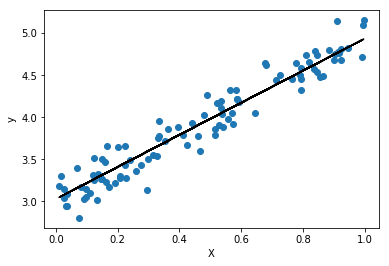

In [12]:
# created the predicted y values based on the calculated thetas
for i in range(X.shape[0]):
    y_predict = theta0 + theta1*X 

# plot the data
plt.plot(X,y,'o')
plt.plot(X,y_predict,'k-')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

 As can be seen, the regression line fits pretty well to the data.

### Loss Profile

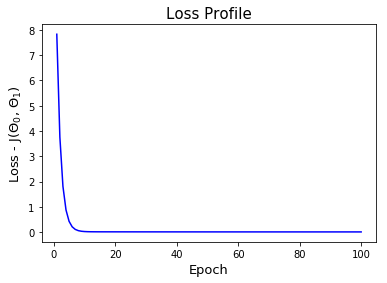

In [13]:
# Get loss history
loss = J

# Create count of the number of epochs
epoch_count = range(1, len(J)+1)

# Visualize loss history
plt.plot(epoch_count, loss, 'b')
plt.title('Loss Profile', {'fontsize': 15})
plt.xlabel('Epoch', {'fontsize': 13})
plt.ylabel('Loss - J($\Theta_0$, $\Theta_1$)', {'fontsize': 13})
plt.show()

As can be seen, the error drops significantly in the first 10 iterations and after that it smooths out.

## Visualize the Gradient Descent 

The gradient descent method starts with a set of initial parameter values of $\theta$ (in our case, $\theta_0=0, \theta_1 = 0)$), and then follows an iterative procedure, changing the values of $\theta_j$ so that the $J(\theta_0, \theta_1)$ decreases.


In this two-dimensional problem, we can plot a simple graph for $J(\theta_0, \theta_1)$ and follow the iterative procedure which tries to converge on its minimum. Fitting a general straight line to a data set requires two parameters, and so $J(\theta_0, \theta_1)$ can be visualized as a contour plot (right image). The same iterative procedure over these two parameters can also be followed as points on this plot (left image).

<img src="fit.gif" alt="gif fit" align="left" /> <br>

The function below generates the above scatter-plot and the relevant contour plot which visualizes the $J(\theta_0, \theta_1)$. It takes as an input the number of the GD step that we need to visualize.

In [14]:
def GD_plot(i):  
    # Initialize the figure
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
    ax[0].scatter(X, y, marker='x', s=40, color='orange')

    # Annotate the cost function plot with coloured points indicating the
    # parameters chosen and red arrows indicating the steps down the gradient.
    # Also plot the fit function on the data plot in a matching colour.

    # Scatter-plot
    ax[0].plot(X, f(X, *theta[i]),  lw=2,
               label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[i]))


    # First construct a grid of (theta0, theta1) parameter pairs and their
    # corresponding cost function values.
    theta0_grid = np.linspace(-1,4,100)
    theta1_grid = np.linspace(-5,5,100)
    J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                       theta1_grid[:,np.newaxis,np.newaxis])

    # A labeled contour plot for the cost function
    X_, Y_ = np.meshgrid(theta0_grid, theta1_grid)
    contours = ax[1].contour(X_, Y_, J_grid, 40)
    ax[1].clabel(contours)


    # Draw the line in the contour plot for a number of GD steps
    for j in range(1,i):
        ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                       arrowprops={'arrowstyle': '->', 
                       'color': 'r', 'lw': 1},
                       va='center', ha='center')

    ax[1].scatter(*zip(*theta[0:i+1]),  s=20, lw=0)

    # Labels, titles and a legend.
    ax[1].set_xlabel(r'$\theta_0$', {'fontsize': 14})
    ax[1].set_ylabel(r'$\theta_1$', {'fontsize': 14})
    ax[1].set_title(r'$J$($\theta_0$,$\theta_1$)', {'fontsize': 16})
    ax[0].set_xlabel(r'$x$', {'fontsize': 14})
    ax[0].set_ylabel(r'$y$', {'fontsize': 14})
    ax[0].set_title(r'$h$($x$)', {'fontsize': 16})
    ax[0].set_xlim(-0.1, 1.1)
    ax[0].set_ylim(2, 6)
    
    # Position the legend by hand so that it doesn't cover up any of the lines.
    ax[0].legend(loc=0, fontsize='medium')


By plotting the first steps of the GD algorithm we can see how the line gradually starts to fit the data-points as the error $J(\theta_0, \theta_1)$ decreases (i.e. reaches the center of the contour)

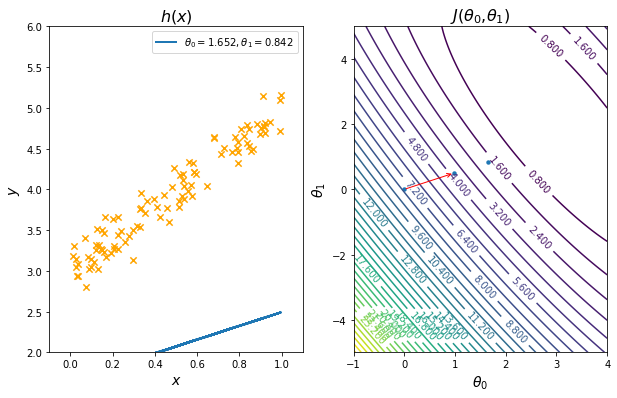

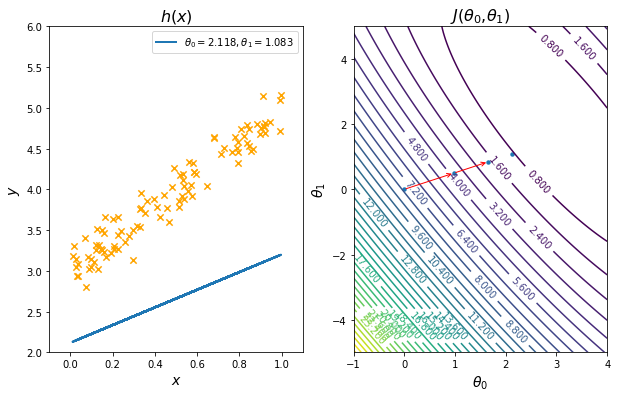

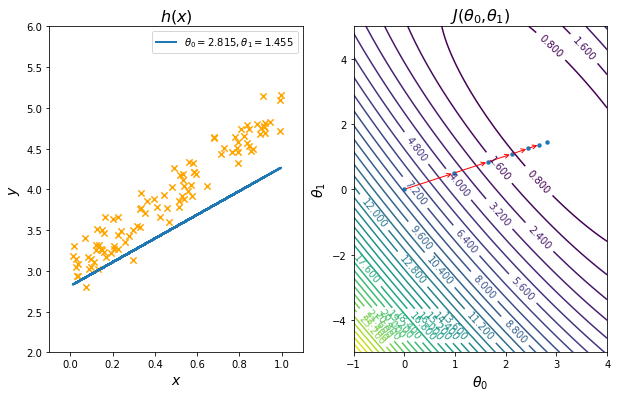

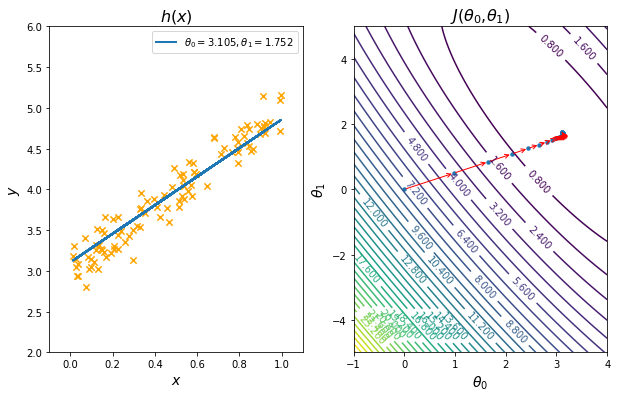

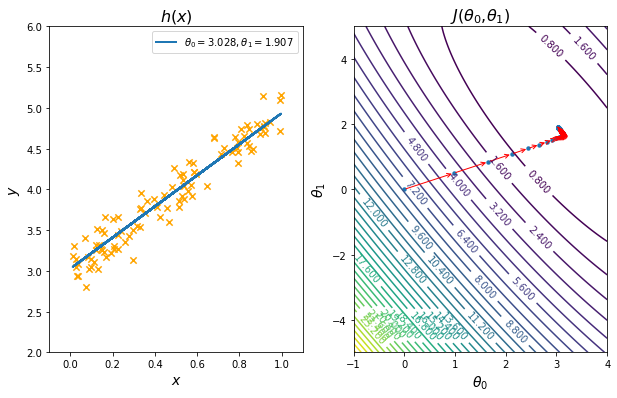

In [15]:
# plot the 2nd, 3rd, 6th ,30th, 99th GD step
for i in (2,3,6,30,99):
    GD_plot(i)
    

## Cross-Check with scikit-learn


In [16]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (X.reshape(-1, 1),y.reshape(-1, 1))
print("Scikit-learn estimated that the function is:\n y = {} + {}*x".format(round(reg.intercept_[0],3),
                                                                    round(reg.coef_[0][0],3)))

Scikit-learn estimated that the function is:
 y = 2.998 + 1.966*x


The theta values calculated by scikit-learn are also close to the true thetas. 